<a href="https://colab.research.google.com/github/TonyNguyen001/BaiTapAI/blob/main/4_Lo%E1%BA%A1i_%C4%91%E1%BB%93_%C4%83n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://drive.google.com/drive/folders/1WXb6potMxsUhPBNCyQG2FsgnCQTaJUf8?usp=sharing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/4loaidoan/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/4loaidoan/validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 60 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


In [4]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [5]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [6]:
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
2/2 [==============================] - 22s 9s/step - loss: 13.0409 - accuracy: 0.2500 - val_loss: 3.9433 - val_accuracy: 0.1875
Epoch 2/100
2/2 [==============================] - 6s 3s/step - loss: 1.6799 - accuracy: 0.5500 - val_loss: 2.9448 - val_accuracy: 0.0625
Epoch 3/100
2/2 [==============================] - 6s 3s/step - loss: 1.0336 - accuracy: 0.5667 - val_loss: 3.4515 - val_accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 6s 3s/step - loss: 1.0872 - accuracy: 0.4833 - val_loss: 2.3078 - val_accuracy: 0.1875
Epoch 5/100
2/2 [==============================] - 6s 3s/step - loss: 0.9847 - accuracy: 0.5500 - val_loss: 1.9183 - val_accuracy: 0.2500
Epoch 6/100
2/2 [==============================] - 6s 3s/step - loss: 1.0015 - accuracy: 0.7000 - val_loss: 2.0127 - val_accuracy: 0.1875
Epoch 7/100
2/2 [==============================] - 6s 3s/step - loss: 0.9042 - accuracy: 0.6000 - val_loss: 2.6072 - val_accuracy: 0.1875
Epoch 8/100
2/2 [===========

Sai số kiểm tra là:  17.3544921875
Độ chính xác kiểm tra là:  0.25


<function matplotlib.pyplot.show>

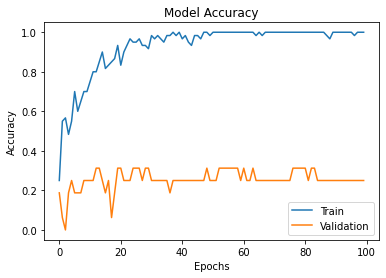

In [7]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [8]:
model.save('model_4_Mon_an.h5')
model=load_model('model_4_Mon_an.h5')

Banhdalon


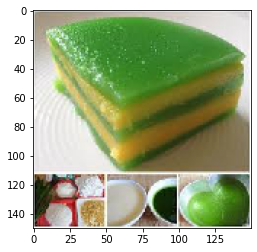

In [9]:
img=load_img("/content/drive/MyDrive/4loaidoan/test/Banhdalon.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Banhdalon'
if round(result[0][1])==1:
  prediction='Banhhoi'
if round(result[0][2])==1:
  prediction='Banhuot'
if round(result[0][3])==1:
  prediction='Banhxeo'
print(prediction)

Banhhoi


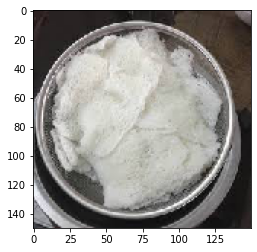

In [10]:
img=load_img("/content/drive/MyDrive/4loaidoan/test/Banhhoi.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Banhdalon'
if round(result[0][1])==1:
  prediction='Banhhoi'
if round(result[0][2])==1:
  prediction='Banhuot'
if round(result[0][3])==1:
  prediction='Banhxeo'
print(prediction)

Banhuot


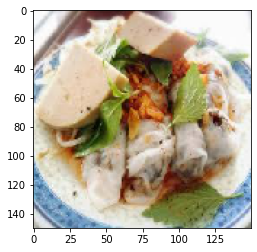

In [11]:
img=load_img("/content/drive/MyDrive/4loaidoan/test/Banhuot.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Banhdalon'
if round(result[0][1])==1:
  prediction='Banhhoi'
if round(result[0][2])==1:
  prediction='Banhuot'
if round(result[0][3])==1:
  prediction='Banhxeo'
print(prediction)

Banhxeo


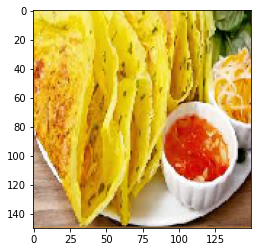

In [12]:
img=load_img("/content/drive/MyDrive/4loaidoan/test/Banhxeo.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Banhdalon'
if round(result[0][1])==1:
  prediction='Banhhoi'
if round(result[0][2])==1:
  prediction='Banhuot'
if round(result[0][3])==1:
  prediction='Banhxeo'
print(prediction)